In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r"G:\Hemant_Data\DBDA_Project\flight_data/Merged_Flight_Weather.csv", index_col = 0)
df.head()

,index_x,ArrDel15,ArrDelayMinutes,ArrTime,CRSArrTime,CRSDepTime,DayofMonth,DepDel15,DepDelayMinutes,DepTime,...,pressure,cloudcover,DewPointF,WindGustKmph,tempF,WindChillF,humidity,time,date,airport
0,0,0.0,8.0,1610.0,1602,745,1,0.0,0.0,741.0,...,1030,0,23,8,34,29,65,800,2016-01-01,SEA
1,12608,1.0,33.0,1237.0,1204,820,1,0.0,1.0,821.0,...,1030,0,23,8,34,29,65,800,2016-01-01,SEA
2,50768,0.0,0.0,1138.0,1143,759,1,0.0,0.0,754.0,...,1030,0,23,8,34,29,65,800,2016-01-01,SEA
3,51023,0.0,10.0,1401.0,1351,738,1,0.0,2.0,740.0,...,1030,0,23,8,34,29,65,800,2016-01-01,SEA
4,61167,0.0,0.0,1524.0,1527,745,1,0.0,0.0,742.0,...,1030,0,23,8,34,29,65,800,2016-01-01,SEA


In [3]:
df.columns

Index(['index_x', 'ArrDel15', 'ArrDelayMinutes', 'ArrTime', 'CRSArrTime',
       'CRSDepTime', 'DayofMonth', 'DepDel15', 'DepDelayMinutes', 'DepTime',
       'Dest', 'DestAirportID', 'FlightDate', 'Month', 'Origin',
       'OriginAirportID', 'Quarter', 'Year', 'DeptTime', 'index_y',
       'windspeedKmph', 'winddirDegree', 'weatherCode', 'precipMM',
       'visibility', 'pressure', 'cloudcover', 'DewPointF', 'WindGustKmph',
       'tempF', 'WindChillF', 'humidity', 'time', 'date', 'airport'],
      dtype='object')

In [4]:
df.shape

(1851091, 35)

In [5]:
df.isna().sum()

index_x            0
ArrDel15           0
ArrDelayMinutes    0
ArrTime            0
CRSArrTime         0
CRSDepTime         0
DayofMonth         0
DepDel15           0
DepDelayMinutes    0
DepTime            0
Dest               0
DestAirportID      0
FlightDate         0
Month              0
Origin             0
OriginAirportID    0
Quarter            0
Year               0
DeptTime           0
index_y            0
windspeedKmph      0
winddirDegree      0
weatherCode        0
precipMM           0
visibility         0
pressure           0
cloudcover         0
DewPointF          0
WindGustKmph       0
tempF              0
WindChillF         0
humidity           0
time               0
date               0
airport            0
dtype: int64

In [6]:
df = df.drop(columns=['index_x', 'time', 'date', 'FlightDate', 'index_y', 'DeptTime', 
                      'ArrTime'])
df.head()

,ArrDel15,ArrDelayMinutes,CRSArrTime,CRSDepTime,DayofMonth,DepDel15,DepDelayMinutes,DepTime,Dest,DestAirportID,...,precipMM,visibility,pressure,cloudcover,DewPointF,WindGustKmph,tempF,WindChillF,humidity,airport
0,0.0,8.0,1602,745,1,0.0,0.0,741.0,JFK,12478,...,0.0,10,1030,0,23,8,34,29,65,SEA
1,1.0,33.0,1204,820,1,0.0,1.0,821.0,PHX,14107,...,0.0,10,1030,0,23,8,34,29,65,SEA
2,0.0,0.0,1143,759,1,0.0,0.0,754.0,DEN,11292,...,0.0,10,1030,0,23,8,34,29,65,SEA
3,0.0,10.0,1351,738,1,0.0,2.0,740.0,IAH,12266,...,0.0,10,1030,0,23,8,34,29,65,SEA
4,0.0,0.0,1527,745,1,0.0,0.0,742.0,ATL,10397,...,0.0,10,1030,0,23,8,34,29,65,SEA


In [7]:
df.columns

Index(['ArrDel15', 'ArrDelayMinutes', 'CRSArrTime', 'CRSDepTime', 'DayofMonth',
       'DepDel15', 'DepDelayMinutes', 'DepTime', 'Dest', 'DestAirportID',
       'Month', 'Origin', 'OriginAirportID', 'Quarter', 'Year',
       'windspeedKmph', 'winddirDegree', 'weatherCode', 'precipMM',
       'visibility', 'pressure', 'cloudcover', 'DewPointF', 'WindGustKmph',
       'tempF', 'WindChillF', 'humidity', 'airport'],
      dtype='object')

In [8]:
df.duplicated().sum()

66

In [9]:
df.drop_duplicates(inplace=True)
df.shape

(1851025, 28)

### Label Encoding using cat.codes
Label Encoding refers to converting the labels into numeric form so as to convert it into the machine-readable form. Machine learning algorithms can then decide in a better way on how those labels must be operated. It is an important pre-processing step for the structured dataset in supervised learning.
Here we are label encoding the `Origin` and the `airport` features, by first converting them to category type and then using `cat.codes` 

In [10]:
df.dtypes

ArrDel15           float64
ArrDelayMinutes    float64
CRSArrTime           int64
CRSDepTime           int64
DayofMonth           int64
DepDel15           float64
DepDelayMinutes    float64
DepTime            float64
Dest                object
DestAirportID        int64
Month                int64
Origin              object
OriginAirportID      int64
Quarter              int64
Year                 int64
windspeedKmph        int64
winddirDegree        int64
weatherCode          int64
precipMM           float64
visibility           int64
pressure             int64
cloudcover           int64
DewPointF            int64
WindGustKmph         int64
tempF                int64
WindChillF           int64
humidity             int64
airport             object
dtype: object

In [11]:
df["Origin"] = df["Origin"].astype('category')
df["airport"] = df["airport"].astype('category')
df["Dest"] = df["Dest"].astype('category')
# To see if our features have convered to category
df.dtypes

ArrDel15            float64
ArrDelayMinutes     float64
CRSArrTime            int64
CRSDepTime            int64
DayofMonth            int64
DepDel15            float64
DepDelayMinutes     float64
DepTime             float64
Dest               category
DestAirportID         int64
Month                 int64
Origin             category
OriginAirportID       int64
Quarter               int64
Year                  int64
windspeedKmph         int64
winddirDegree         int64
weatherCode           int64
precipMM            float64
visibility            int64
pressure              int64
cloudcover            int64
DewPointF             int64
WindGustKmph          int64
tempF                 int64
WindChillF            int64
humidity              int64
airport            category
dtype: object

In [12]:
df["Origin"] = df["Origin"].cat.codes
df["airport"] = df["airport"].cat.codes
df["Dest"] = df["Dest"].cat.codes
df.head()

,ArrDel15,ArrDelayMinutes,CRSArrTime,CRSDepTime,DayofMonth,DepDel15,DepDelayMinutes,DepTime,Dest,DestAirportID,...,precipMM,visibility,pressure,cloudcover,DewPointF,WindGustKmph,tempF,WindChillF,humidity,airport
0,0.0,8.0,1602,745,1,0.0,0.0,741.0,6,12478,...,0.0,10,1030,0,23,8,34,29,65,13
1,1.0,33.0,1204,820,1,0.0,1.0,821.0,12,14107,...,0.0,10,1030,0,23,8,34,29,65,13
2,0.0,0.0,1143,759,1,0.0,0.0,754.0,2,11292,...,0.0,10,1030,0,23,8,34,29,65,13
3,0.0,10.0,1351,738,1,0.0,2.0,740.0,5,12266,...,0.0,10,1030,0,23,8,34,29,65,13
4,0.0,0.0,1527,745,1,0.0,0.0,742.0,0,10397,...,0.0,10,1030,0,23,8,34,29,65,13


In [13]:
df.dtypes

ArrDel15           float64
ArrDelayMinutes    float64
CRSArrTime           int64
CRSDepTime           int64
DayofMonth           int64
DepDel15           float64
DepDelayMinutes    float64
DepTime            float64
Dest                  int8
DestAirportID        int64
Month                int64
Origin                int8
OriginAirportID      int64
Quarter              int64
Year                 int64
windspeedKmph        int64
winddirDegree        int64
weatherCode          int64
precipMM           float64
visibility           int64
pressure             int64
cloudcover           int64
DewPointF            int64
WindGustKmph         int64
tempF                int64
WindChillF           int64
humidity             int64
airport               int8
dtype: object

In [14]:
df.Origin.value_counts()

8     209305
14    166921
11    153437
0     146720
2     144148
7     132150
3     125900
13    115703
12    114007
4     100167
9      99564
6      93426
5      89551
1      83486
10     76540
Name: Origin, dtype: int64

In [15]:
df.airport.value_counts()

8     209305
14    166921
11    153437
0     146720
2     144148
7     132150
3     125900
13    115703
12    114007
4     100167
9      99564
6      93426
5      89551
1      83486
10     76540
Name: airport, dtype: int64

##### Feature exploration
Since there are no missing values or categorical variables we can continue further and look at the corellation between various features of the dataframe

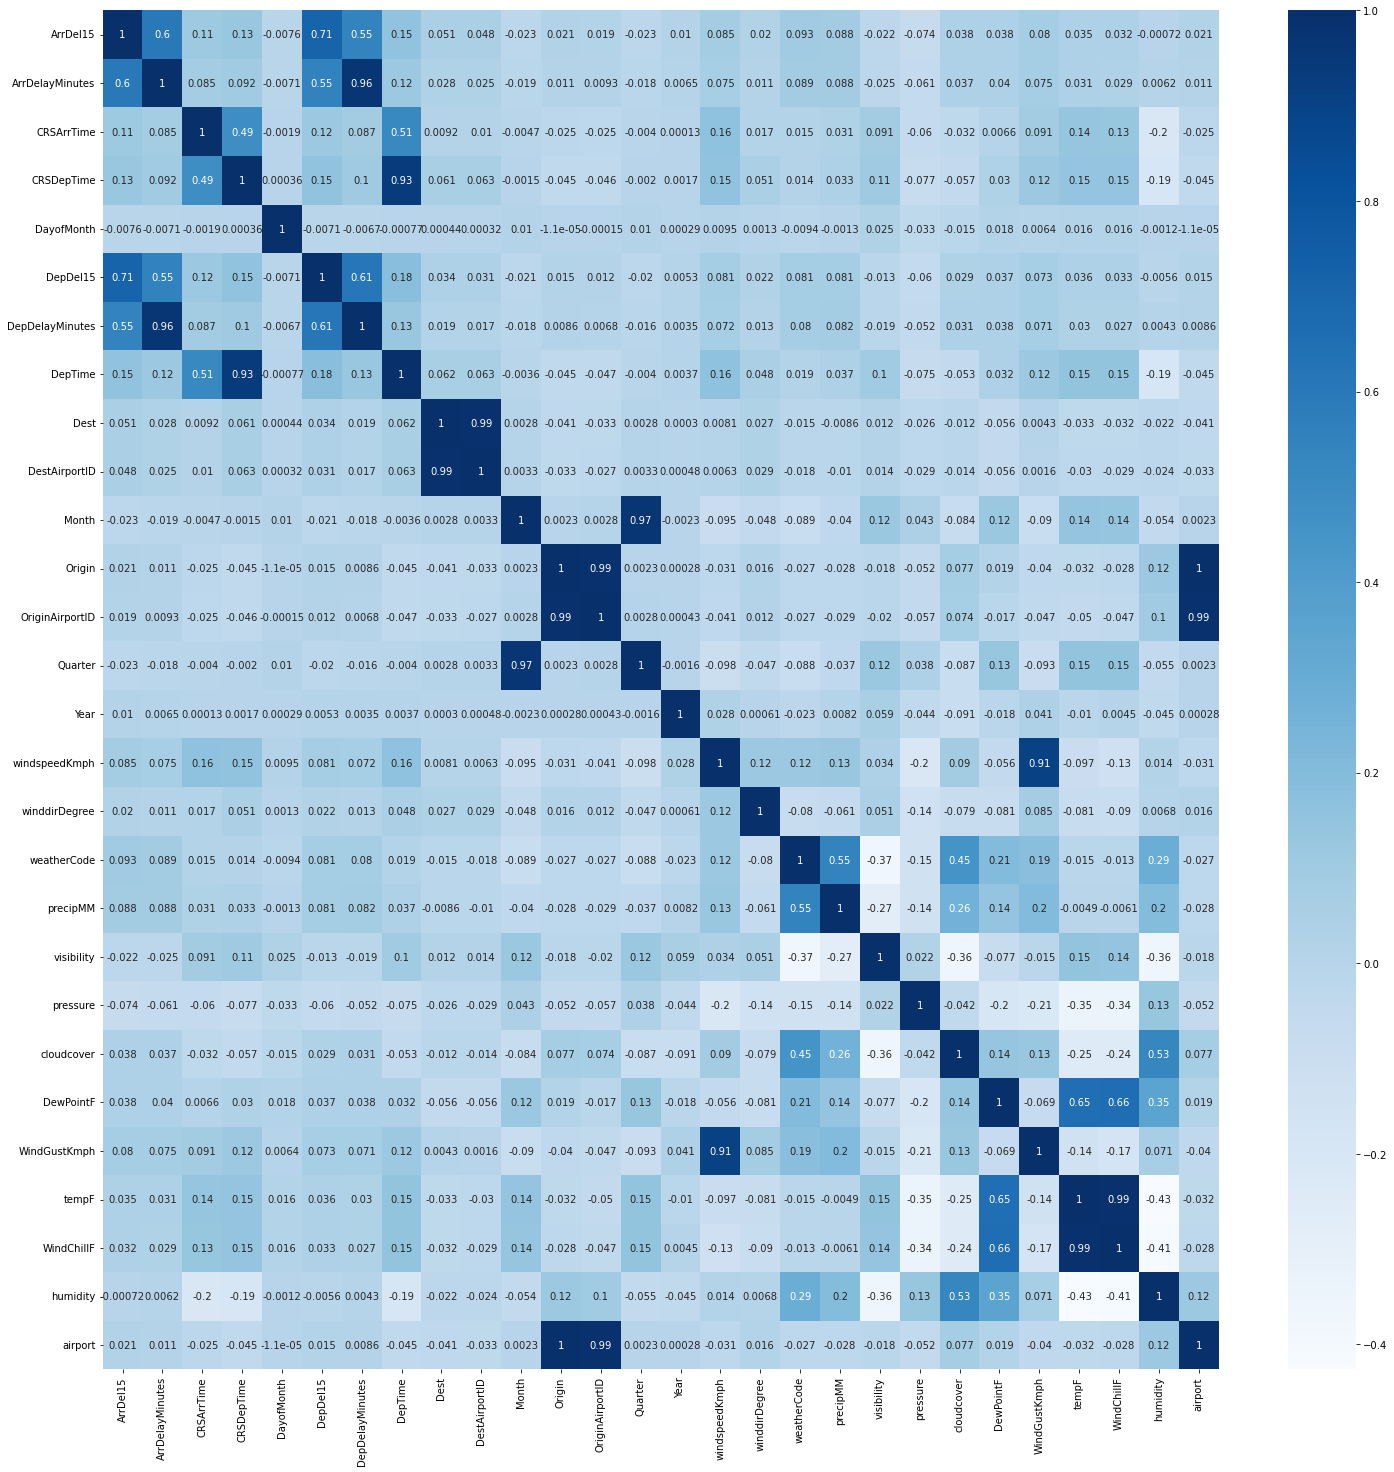

In [16]:
plt.figure(figsize=(25,25))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap='Blues')
plt.show()

#### Filtering the data
We will only be looking at those flights which arrived late because it will be redundant to predict the delay in muntes for flights that have not arrived late.

In [17]:
# Looking at only those flights that arrived late
temp = df[df.ArrDel15 == 1.0]
y = temp['ArrDelayMinutes']
X = temp.drop(columns = ['ArrDelayMinutes', 'ArrDel15'])

In [18]:
X.head()

,CRSArrTime,CRSDepTime,DayofMonth,DepDel15,DepDelayMinutes,DepTime,Dest,DestAirportID,Month,Origin,...,precipMM,visibility,pressure,cloudcover,DewPointF,WindGustKmph,tempF,WindChillF,humidity,airport
1,1204,820,1,0.0,1.0,821.0,12,14107,1,13,...,0.0,10,1030,0,23,8,34,29,65,13
6,1628,800,1,0.0,2.0,802.0,9,13204,1,13,...,0.0,10,1030,0,23,8,34,29,65,13
9,1204,820,2,0.0,0.0,820.0,12,14107,1,13,...,0.0,10,1024,0,25,8,37,33,63,13
12,1019,730,2,0.0,0.0,730.0,8,12892,1,13,...,0.0,10,1024,0,25,8,37,33,63,13
13,1112,827,2,0.0,14.0,841.0,8,12892,1,13,...,0.0,10,1024,0,25,8,37,33,63,13


In [19]:
X.columns

Index(['CRSArrTime', 'CRSDepTime', 'DayofMonth', 'DepDel15', 'DepDelayMinutes',
       'DepTime', 'Dest', 'DestAirportID', 'Month', 'Origin',
       'OriginAirportID', 'Quarter', 'Year', 'windspeedKmph', 'winddirDegree',
       'weatherCode', 'precipMM', 'visibility', 'pressure', 'cloudcover',
       'DewPointF', 'WindGustKmph', 'tempF', 'WindChillF', 'humidity',
       'airport'],
      dtype='object')

In [20]:
X.shape

(388000, 26)

In [21]:
# Splitting the data into train and test data
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.75, random_state = 2022)

In [22]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((291000, 26), (97000, 26), (291000,), (97000,))

# Prediction

## Linear Regression

In [23]:
from sklearn.linear_model import LinearRegression
linear_regressor = LinearRegression()
linear_regressor.fit(X_train,y_train)
y_pred_linear_regression = linear_regressor.predict(X_test)

In [24]:
import sklearn.metrics as metrics
mean_absolute_error=metrics.mean_absolute_error(y_test, y_pred_linear_regression) 
MSE=metrics.mean_squared_error(y_test, y_pred_linear_regression) 
RMSE= np.sqrt(MSE)
R2=metrics.r2_score(y_test, y_pred_linear_regression)
print("MAE: {}".format(mean_absolute_error))
print("MSE: {}".format(MSE))
print("RMSE: {}".format(RMSE))
print("R-Squared: {}".format(R2))

MAE: 12.288532353141406
MSE: 315.77427619280195
RMSE: 17.7700387223214
R-Squared: 0.938422670251328


## XGboost Regressor

In [27]:
from xgboost import XGBRegressor
xgboost_regressor = XGBRegressor(random_state=2022)
xgboost_regressor.fit(X_train,y_train)
y_pred_xgboost = xgboost_regressor.predict(X_test)

C:\Users\kruna\anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kruna\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


In [28]:
mean_absolute_error=metrics.mean_absolute_error(y_test, y_pred_xgboost) 
MSE=metrics.mean_squared_error(y_test, y_pred_xgboost) 
RMSE= np.sqrt(MSE)
R2=metrics.r2_score(y_test, y_pred_xgboost)
print("MAE: {}".format(mean_absolute_error))
print("MSE: {}".format(MSE))
print("RMSE: {}".format(RMSE))
print("R-Squared: {}".format(R2))

MAE: 11.265275675095234
MSE: 266.93148603441745
RMSE: 16.33803801055737
R-Squared: 0.947947222509637


## Random forest Regressor

In [29]:
from sklearn.ensemble import RandomForestRegressor
random_forest_regressor = RandomForestRegressor(random_state=2022)
random_forest_regressor.fit(X_train,y_train)
y_pred_random_forest = random_forest_regressor.predict(X_test)

In [30]:
mean_absolute_error=metrics.mean_absolute_error(y_test, y_pred_random_forest) 
MSE=metrics.mean_squared_error(y_test, y_pred_random_forest) 
RMSE= np.sqrt(MSE)
R2=metrics.r2_score(y_test, y_pred_random_forest)
print("MAE: {}".format(mean_absolute_error))
print("MSE: {}".format(MSE))
print("RMSE: {}".format(RMSE))
print("R-Squared: {}".format(R2))

MAE: 11.855527922680409
MSE: 287.01812304982445
RMSE: 16.941609222556885
R-Squared: 0.9440302426784984


## Decision trees Regressor

In [31]:
from sklearn.tree import DecisionTreeRegressor
decision_tree_regressor = DecisionTreeRegressor(random_state=2022)
decision_tree_regressor.fit(X_train,y_train)
y_pred_decision_tree = decision_tree_regressor.predict(X_test)

In [32]:
mean_absolute_error=metrics.mean_absolute_error(y_test, y_pred_decision_tree) 
MSE=metrics.mean_squared_error(y_test, y_pred_decision_tree) 
RMSE= np.sqrt(MSE)
R2=metrics.r2_score(y_test, y_pred_decision_tree)
print("MAE: {}".format(mean_absolute_error))
print("MSE: {}".format(MSE))
print("RMSE: {}".format(RMSE))
print("R-Squared: {}".format(R2))

MAE: 16.65155154639175
MSE: 591.0593530927835
RMSE: 24.31171226164014
R-Squared: 0.8847409069375591


## Results for Regressor (ArrDelayMinutes) 

|MODEL                       |   MAE    |  MSE   |  RMSE   | R-Squared |
|----------------------------|----------|--------|---------|-----------|  
| ``Linear Regression``      |  12.28   | 315.77 |  17.77  |   0.938   |
| ``XGboost Regressor``      |  11.26   | 266.93 |  16.33  |   0.947   |
| ``Random forest Regressor``|  11.85   | 287.01 |  16.94  |   0.944   |
| ``Decision Trees``         |  16.65   | 591.05 |  24.31  |   0.884   |
